Find Max Embedding threshold Algorithm:
1.	Prepare in advance 10 pairs of accepted similar words and 10 accepted unsimilar words
2.	Search for a threshold that lets most of the similar group to pass and most of the unsimilar group to fail


### 10 pairs of very similar words:


In [1]:
best_pairs_ls = [
    ['good','great'],
    ['dog','cat'],
    ['green','yellow'],
    ['dad','mom'],
    ['purchase','buy'],
    ['gift','present'],
    ['fast','quick'],
    ['big','huge'],
    ['item','product'],
    ['text','script']]

### 10 pairs of very un-similar words:

### we wanted to take opposites since they have a semantic meaning that will help us later in our task

In [2]:
worst_pairs_ls = [
    ['good','bad'],
    ['thin','fat'],
    ['black','white'],
    ['tall','small'],
    ['boy','buy'],
    ['novel','old'],
    ['high','low'],
    ['hot','cold'],
    ['strong','week'],
    ['poor','rich']]

### using glove to get words embeddings

In [30]:
# imports
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [4]:
# upload model:
import gensim.downloader as api
glove_model = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [5]:
# flatten both lists above:
flat_best_pairs_ls = list(itertools.chain.from_iterable(best_pairs_ls))
flat_worst_pairs_ls = list(itertools.chain.from_iterable(worst_pairs_ls))

X = flat_best_pairs_ls + flat_worst_pairs_ls

In [6]:
from keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_token = "<OOV>"  # words OOV
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X)

In [7]:
# mapping of the words to numbers
word_index = tokenizer.word_index

In [8]:
# define stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Iterate over your dictionary of words and embed them using GloVe
embedded_dict = {}
for word, idx in word_index.items():
    if word in sw:
      print(word)
    if word not in sw:
        try:
            embedded_dict[word] = glove_model[word]
        except KeyError:
            # If the word is not in the GloVe vocabulary, assign a default embedding or skip it
            pass

use the above embedings and return a vectore of cosine distances between the words in each pair

calc dist between each pair of words:

In [10]:
sim_list_best = []

for pair in best_pairs_ls:
  #print(pair)
  # calc cosine dist between w1 and w2
  emb1 = embedded_dict[pair[0]]
  emb2 = embedded_dict[pair[1]]
  similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
  sim_list_best.append(similarity)

  print(pair[0],pair[1],similarity)

good great 0.9378517
dog cat 0.959082
green yellow 0.9095074
dad mom 0.98429936
purchase buy 0.9019171
gift present 0.8497384
fast quick 0.8828085
big huge 0.8811403
item product 0.70012844
text script 0.5802373


In [11]:
sim_list_worst = []
for pair in worst_pairs_ls:
  #print(pair)
  # calc cosine dist between w1 and w2
  emb1 = embedded_dict[pair[0]]
  emb2 = embedded_dict[pair[1]]
  similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
  sim_list_worst.append(similarity)
  print(pair[0],pair[1],similarity)

good bad 0.914787
thin fat 0.8174718
black white 0.9801281
tall small 0.84290236
boy buy 0.736734
novel old 0.5412349
high low 0.8755867
hot cold 0.76983505
strong week 0.6098519
poor rich 0.7939414


calc mean distance for good and bad pairs:

In [12]:
mean_best = np.mean(sim_list_best)
mean_best
best_dist = 1 - mean_best
print(f'mean dist between very similar words:{best_dist}')

mean dist between very similar words:0.14132893085479736


In [13]:
mean_worst = np.mean(sim_list_worst)
mean_worst
worst_dist = 1 - mean_worst
print(f'mean dist between very different words:{worst_dist}')

mean dist between very different words:0.21175271272659302


##  Intermidiate conclusion, our threshold for cluster max_dist should be in the middle of the two values above = 0.1765

In [14]:
(best_dist+worst_dist)/2

0.1765408217906952

### embeding out 1000 documents using glove

In [15]:
# load our dataset - 1000 documents from Amazon reviews (Kaggle)
df = pd.read_csv('df_filtered.csv')

In [17]:
# work on a copy
# embed using glove
df_copy = df.copy()

In [18]:
X = df_copy['txt']
y = df_copy['sentiment']  # currently not in use

In [19]:
from keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_token = "<OOV>"  # words OOV
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X)

In [20]:
# mapping of the words to numbers
word_index = tokenizer.word_index

In [21]:
# Iterate over your dictionary of words and embed them using GloVe
embedded_dict = {}
for word, idx in word_index.items():
    if word in sw:
      print(word)
    if word not in sw:
        try:
            embedded_dict[word] = glove_model[word]
        except KeyError:
            # If the word is not in the GloVe vocabulary, assign a default embedding or skip it
            pass

the
i
it
this
and
a
is
to
was
of
for
in
not
very
my
have
with
but
you
on
all
that
as
just
what
are
so
be
if
will
at
had
again
am
an
no
did
from
me
has
about
it's
they
more
do
too
any
these
he
them
out
over
when
up
who
than
your
been
can
didn't
only
don't
now
there
we
most
then
by
were
or
other
its
she
his
her
because
some
down
into
couldn't
should
their
after
few
how
doesn't
does
before
wasn't
same
own
our
through
those
once
which
off
such
you're
being
wouldn't
haven't
myself
d
you'll
why
both
re
s
until
between
you've
under
while
him
where
isn't
here
doing
above
having
won't
hasn't
ll
hadn't
nor
ma
won
against
aren't
each
herself
during
yourself
itself
t


In [22]:
embeddings = np.array(list(embedded_dict.values())) # the vectors as np.array

## Clustering using Dbscan

In [23]:
from sklearn.cluster import DBSCAN


In [24]:
## DBSCAN 
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Estimated eps value: 0.028615295886993408


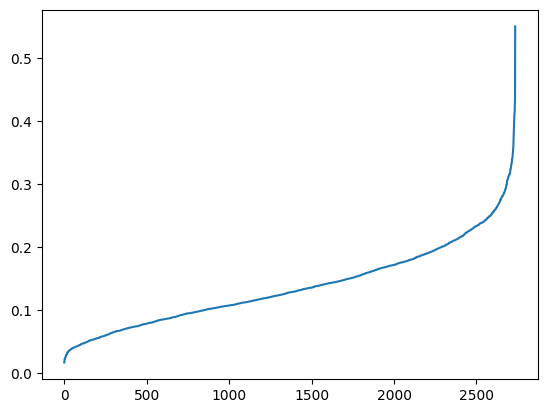

In [31]:
## CODE USED TO FINED EPS VALUE == NO NEED TO RUN THIS AGAIN
if True: 
    from kneed import KneeLocator
    from sklearn.neighbors import NearestNeighbors

    # Compute the k-distances for each point
    k = 3
    neigh = NearestNeighbors(n_neighbors=k,metric = 'cosine')
    neigh.fit(embeddings)
    distances, indices = neigh.kneighbors(embeddings)

    # Sort the distances and flatten them into a 1D array
    sorted_distances = np.sort(distances[:,k-1], axis=None)

    # Plot the k-distance graph
    plt.plot(sorted_distances)

    # Find the elbow point
    kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, S=1.0, curve='concave', direction='increasing')
    eps = sorted_distances[kneedle.elbow]

    print(f"Estimated eps value: {eps}")
    first_run=False

In [32]:
# metric='cosine'
dbscan = DBSCAN(eps=0.028, min_samples=2, metric='cosine')  

In [33]:
dbscan.fit(embeddings)


DBSCAN(eps=0.028, metric='cosine', min_samples=2)

In [34]:
labels = dbscan.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [35]:
clusters = {}
for i, key in enumerate(embedded_dict.keys()):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(key)

view how many words in each cluster

In [36]:
for key, val in clusters.items():
    print(f'Cluster {key} includes {len(val)} words')

Cluster -1 includes 2686 words
Cluster 0 includes 2 words
Cluster 1 includes 6 words
Cluster 2 includes 2 words
Cluster 3 includes 2 words
Cluster 4 includes 2 words
Cluster 5 includes 4 words
Cluster 6 includes 4 words
Cluster 7 includes 3 words
Cluster 8 includes 2 words
Cluster 9 includes 2 words
Cluster 10 includes 3 words
Cluster 11 includes 2 words
Cluster 12 includes 2 words
Cluster 13 includes 2 words
Cluster 14 includes 2 words
Cluster 15 includes 2 words
Cluster 16 includes 2 words
Cluster 17 includes 2 words
Cluster 18 includes 2 words
Cluster 19 includes 2 words


In [37]:
for key, val in clusters.items():
    print(f'Cluster {key} includes {(val)} words')

Cluster -1 includes ['book', 'great', 'good', 'movie', 'read', 'one', 'love', 'best', 'recommend', 'product', 'like', 'time', 'ever', 'loved', 'price', 'condition', 'story', 'cd', 'excellent', 'classic', 'awesome', 'movies', 'get', 'dvd', 'buy', 'bought', 'books', 'gift', 'perfect', 'quality', 'received', 'purchase', 'well', 'must', 'happy', 'reading', 'got', 'favorite', 'much', 'anyone', 'money', 'looking', 'enjoyed', 'easy', 'arrived', 'little', 'pleased', 'watch', 'album', 'highly', 'work', 'made', 'amazing', 'first', 'see', 'works', 'interesting', 'music', 'service', 'worth', 'better', 'used', 'wonderful', 'use', 'never', 'definitely', 'still', 'nice', 'needed', 'way', 'expected', 'even', 'series', 'boring', 'funny', 'want', 'disappointed', 'copy', 'old', 'pretty', 'hobbit', 'fast', 'worst', 'long', 'item', 'fun', 'loves', 'bad', 'seen', 'film', 'seller', 'ordered', 'enjoy', 'find', 'liked', 'exactly', 'job', 'amazon', 'timely', 'always', 'thanks', 'described', 'purchased', 'game',

2D plot our clustering

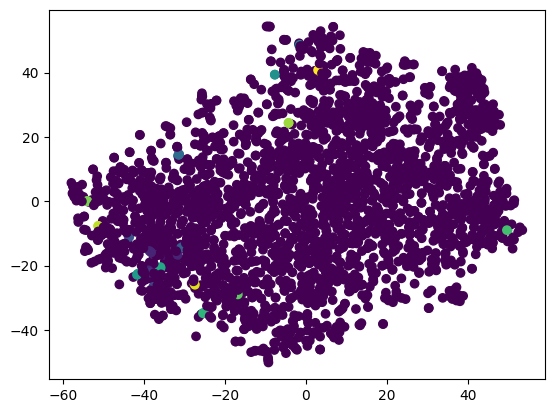

In [38]:
# Import the necessary libraries
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Extract the embeddings from the embedded_dict and store them in a numpy array
embeddings = np.array(list(embedded_dict.values()))

# Perform t-SNE on the embeddings to reduce their dimensionality to 2
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Get the cluster labels assigned by DBSCAN
labels = dbscan.labels_

# Plot the 2D embeddings with different colors for each cluster
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels)
plt.show()

now we would like to find the max_dist within each cluster

In [39]:
# for each cluster calc the max dist between each two embbedings


In [40]:
from itertools import combinations

In [41]:
# NOT RELEVANT#
# find the pair of closest words in the embedded dict and return the words and the similarity score
def find_closest_words(embeddings):
    words = list(embeddings.keys())
    pairs = combinations(words, 2)
    max_similarity = -1
    closest_pair = None
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
        if similarity > max_similarity:
            max_similarity = similarity
            closest_pair = pair
    return closest_pair, max_similarity

In [42]:
# find the pair of most distant words in the embedded dict and return the words and the similarity score
def find_max_dist(embeddings):
    words = list(embeddings.keys())
    pairs = combinations(words, 2)
    max_dist = -1
    closest_pair = None
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
        dist = 1-similarity
        if dist >  max_dist:
            max_dist = dist
            closest_pair = pair
    return closest_pair, max_dist

In [43]:
closest_pair ,max_dist = find_max_dist(embedded_dict)

print(closest_pair)
print(max_dist)

('l', 'limericks')
1.6656466126441956


In [44]:
closest_pair ,max_similarity = find_closest_words(embedded_dict)

print(closest_pair)
print(max_similarity)

('three', 'five')
0.9927426


In [47]:
# count unique labels:
labels_set = set(labels)
labels_set

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [48]:
# init dict of dist:
dist_dict = {}

# for each cluster return the pair of words and max dist of the cluster:
for ind in labels_set:
  filtered_dict = {k: v for k, v in embedded_dict.items() if k in clusters[ind]} # dict of embeddings of the words in the cluster

  #filtered_dict = {k: v for k, v in embedded_dict.items() if v in clusters[ind]}  
  closest_pair ,max_dist = find_max_dist(filtered_dict) # find the two most dist words in the cluster
  dist_dict[ind] = max_dist
  print(closest_pair)
  print(max_dist)

('would', 'could')
0.0098838210105896
('really', 'tell')
0.08340340852737427
('thought', 'knew')
0.0217476487159729
('came', 'went')
0.0231134295463562
('right', 'though')
0.023850679397583008
('nothing', 'anything')
0.03435605764389038
('two', 'four')
0.03474223613739014
('daughter', 'husband')
0.03997600078582764
('r', 'b')
0.020214617252349854
('horrible', 'terrible')
0.026182889938354492
('said', 'asked')
0.04786205291748047
('actually', 'probably')
0.024307310581207275
('older', 'younger')
0.02006596326828003
('disapointed', 'dissappointed')
0.02488076686859131
('however', 'perhaps')
0.022026538848876953
('mom', 'dad')
0.01570063829421997
('black', 'white')
0.019871890544891357
('hahahaha', 'hahahahaha')
0.007807672023773193
('wouldnt', 'couldnt')
0.021497607231140137
('south', 'east')
0.0236780047416687
('l', 'limericks')
1.6656466126441956


In [49]:
dist_dict

{0: 0.0098838210105896,
 1: 0.08340340852737427,
 2: 0.0217476487159729,
 3: 0.0231134295463562,
 4: 0.023850679397583008,
 5: 0.03435605764389038,
 6: 0.03474223613739014,
 7: 0.03997600078582764,
 8: 0.020214617252349854,
 9: 0.026182889938354492,
 10: 0.04786205291748047,
 11: 0.024307310581207275,
 12: 0.02006596326828003,
 13: 0.02488076686859131,
 14: 0.022026538848876953,
 15: 0.01570063829421997,
 16: 0.019871890544891357,
 17: 0.007807672023773193,
 18: 0.021497607231140137,
 19: 0.0236780047416687,
 -1: 1.6656466126441956}

In [50]:
df_copy

,Unnamed: 0,txt,sentiment,num_of_words
0,84,voices from the farm: i have a copy of this bo...,1,27
1,99,"caution!: these tracks are not the ""original"" ...",0,22
2,100,textbook: book shipped quickly and was in exce...,1,16
3,243,it was great!!!: i like it. it was very cool t...,1,21
4,269,dockers do the job.: this product was just wha...,1,25
...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27
1003,41045,i like movies: as someone who likes all kinds ...,1,24
1004,41149,sick and twisted is good...: this book is sick...,1,25
1005,41156,difficult for a lay person: i found this book ...,0,24


if the max_dist is bigger than threshold - don't switch

In [51]:

threshold = 0.17654

In [52]:
df_copy['anon_txt'] = df_copy['txt']
df_copy['anon_txt_clean'] = df_copy['txt']

In [53]:
def get_general_word_from_cluster(word_list, we_model):
    """ Finds the most similar words usind word embedding"""
    glove_words = list(we_model.index_to_key)
    known_words = [w for w in word_list if w in glove_words]
    if len(known_words) > 0:
        we_word = we_model.most_similar(known_words, topn=1)[0][0]
    else:
        we_word = None
    return we_word

In [54]:
# create a list of the "new" words and don't cluster them in the next round
new_words = []
bad_cluster = [] # list of clusters that are too big
# check if cluster max_dist is under threshold:
for cluster_label,cluster_dist in dist_dict.items():
  if cluster_dist>threshold: #too big
    bad_cluster.append(cluster_label)
    print(bad_cluster)


for key, words in clusters.items(): # key = label Words = list of words in the cluster
    if key >= 0  and key not in bad_cluster:  # Ignoring the -1 label
            general_word = get_general_word_from_cluster(words, glove_model)
            new_words.append(general_word)  # the list of new words
            print('\treplacing', words, 'in', general_word)
            for word in words:
                df_copy['anon_txt'] = df_copy['anon_txt'].apply(lambda x: x.replace(word, ''.join([word ,'[', general_word,']'])))
                df_copy['anon_txt_clean'] = df_copy['anon_txt_clean'].apply(lambda x: x.replace(word, general_word))

[-1]
	replacing ['would', 'could'] in should
	replacing ['really', 'think', 'know', 'wonder', 'either', 'tell'] in n't
	replacing ['thought', 'knew'] in wonder
	replacing ['came', 'went'] in took
	replacing ['right', 'though'] in but
	replacing ['nothing', 'everything', 'something', 'anything'] in lot
	replacing ['two', 'three', 'four', 'five'] in six
	replacing ['daughter', 'husband', 'wife'] in father
	replacing ['r', 'b'] in f
	replacing ['horrible', 'terrible'] in cruel
	replacing ['said', 'asked', 'told'] in she
	replacing ['actually', 'probably'] in definitely
	replacing ['older', 'younger'] in hated
	replacing ['disapointed', 'dissappointed'] in embarrased
	replacing ['however', 'perhaps'] in otherwise
	replacing ['mom', 'dad'] in sister
	replacing ['black', 'white'] in blue
	replacing ['hahahaha', 'hahahahaha'] in hahahah
	replacing ['wouldnt', 'couldnt'] in didnt
	replacing ['south', 'east'] in north


In [55]:
df_copy.head()

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_clean
0,84,voices from the farm: i have a copy of this bo...,1,27,voices fr[f]om the far[f]m: i have a copy of t...,voices ffom the fafm: i have a copy of this fo...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution!: these tr[f]acks ar[f]e not the ""or[f...","caution!: these tfacks afe not the ""ofiginal"" ..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textb[f]ook: b[f]ook shipped quickly and was i...,textfook: fook shipped quickly and was in exce...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was gr[f]eat!!!: i like it. it was ver[f]y ...,it was gfeat!!!: i like it. it was vefy cool t...
4,269,dockers do the job.: this product was just wha...,1,25,docker[f]s do the job[f].: this pr[f]oduct was...,dockefs do the jof.: this pfoduct was just wha...


# DRAFTSSSS BELOW

**the following function iterates over all embedded words and find the two closest words with cosine similarity**

In [ ]:
import numpy as np
from itertools import combinations

In [ ]:
# find the pair of closest words in the embedded dict and return the words and the similarity score
def find_closest_words(embeddings):
    words = list(embeddings.keys())
    pairs = combinations(words, 2)
    max_similarity = -1
    closest_pair = None
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
        if similarity > max_similarity:
            max_similarity = similarity
            closest_pair = pair
    return closest_pair, max_similarity

In [ ]:
import numpy as np

def get_top_similar_pairs(embeddings):
    """
    Returns the top 10 pairs of most similar words in the embeddings dictionary.
    """
    # Get the vocabulary and embedding matrix from the embeddings dictionary
    vocab = list(embeddings.keys())
    emb_matrix = np.array(list(embeddings.values()))

    # Calculate the cosine similarity matrix between all pairs of embeddings
    similarity_matrix = emb_matrix @ emb_matrix.T
    similarity_matrix /= np.linalg.norm(emb_matrix, axis=1)[:, np.newaxis]
    similarity_matrix /= np.linalg.norm(emb_matrix, axis=1)[np.newaxis, :]

    # Find the indices of the top 10 pairs of most similar words
    top_pairs_indices = np.argsort(-similarity_matrix, axis=None)[:40]

    # Convert the indices back into word pairs and their similarity scores
    top_pairs_scores = similarity_matrix.flatten()[top_pairs_indices]
    top_pairs = [(vocab[i // len(vocab)], vocab[i % len(vocab)], score)
                 for i, score in zip(top_pairs_indices, top_pairs_scores)]

    # Filter out pairs that have the same word or are reverse duplicates
    top_pairs = [(w1, w2, score) for w1, w2, score in top_pairs
                 if w1 != w2 and (w2, w1, score) not in top_pairs]

    # Sort the top pairs by their similarity score
    top_pairs.sort(key=lambda x: x[2], reverse=True)

    # Return the top 10 pairs
    return top_pairs[:10]

In [ ]:
top_pairs = get_top_similar_pairs(embedded_dict)
print(top_pairs)

[]


In [ ]:
len(embedded_dict)

2736

In [ ]:
closest_pair ,max_similarity = find_closest_words(embedded_dict)

print(closest_pair)
print(max_similarity)

(('three', 'five'), 0.9927426)
0.9927426


In [ ]:
embeddings[1:3,1]

array([0.36512, 0.60274], dtype=float32)

In [ ]:
## DBSCAN 
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## CODE USED TO FINED EPS VALUE == NO NEED TO RUN THIS AGAIN
if True: 
    from kneed import KneeLocator
    from sklearn.neighbors import NearestNeighbors

    # Compute the k-distances for each point
    k = 10
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(embeddings)
    distances, indices = neigh.kneighbors(embeddings)

    # Sort the distances and flatten them into a 1D array
    sorted_distances = np.sort(distances[:,k-1], axis=None)

    # Plot the k-distance graph
    # plt.plot(sorted_distances)

    # Find the elbow point
    kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, S=1.0, curve='concave', direction='increasing')
    eps = sorted_distances[kneedle.elbow]

    print(f"Estimated eps value: {eps}")
    first_run=False

Estimated eps value: 1.8090869733611645


In [ ]:
# Import the necessary libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=2)  # <0.5 returned only one cluster. Chose 3 a min words per cluster (maybe reduce to 2?) Maybe according to k

In [ ]:
dbscan.fit(embeddings)


DBSCAN(eps=1.8090869733611645, min_samples=2)

In [ ]:
labels = dbscan.labels_
labels

array([ 0, -1, -1, ..., -1, -1, -1])

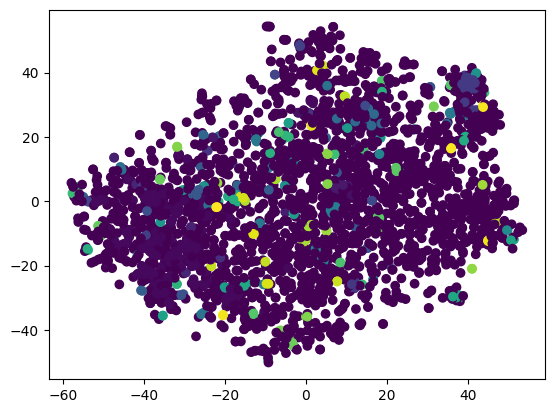

In [ ]:

# Extract the embeddings from the embedded_dict and store them in a numpy array
embeddings = np.array(list(embedded_dict.values()))

# Perform t-SNE on the embeddings to reduce their dimensionality to 2
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Get the cluster labels assigned by DBSCAN
labels = dbscan.labels_

# Plot the 2D embeddings with different colors for each cluster
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels)
plt.show()

In [ ]:
clusters = {}
for i, key in enumerate(embedded_dict.keys()):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(key)

In [ ]:
for key, val in clusters.items():
    print(f'Cluster {key} includes {len(val)} words')

Cluster 0 includes 2 words
Cluster -1 includes 2132 words
Cluster 1 includes 2 words
Cluster 2 includes 222 words
Cluster 3 includes 3 words
Cluster 4 includes 4 words
Cluster 5 includes 2 words
Cluster 6 includes 2 words
Cluster 7 includes 2 words
Cluster 8 includes 9 words
Cluster 9 includes 2 words
Cluster 10 includes 2 words
Cluster 11 includes 2 words
Cluster 12 includes 2 words
Cluster 13 includes 2 words
Cluster 14 includes 2 words
Cluster 15 includes 2 words
Cluster 16 includes 2 words
Cluster 17 includes 3 words
Cluster 18 includes 2 words
Cluster 19 includes 2 words
Cluster 20 includes 2 words
Cluster 21 includes 8 words
Cluster 22 includes 29 words
Cluster 23 includes 3 words
Cluster 24 includes 2 words
Cluster 25 includes 2 words
Cluster 26 includes 4 words
Cluster 27 includes 2 words
Cluster 28 includes 3 words
Cluster 29 includes 2 words
Cluster 30 includes 2 words
Cluster 31 includes 2 words
Cluster 32 includes 2 words
Cluster 33 includes 3 words
Cluster 34 includes 4 wo

In [ ]:
def get_general_word_from_cluster(word_list, we_model):
    """ Finds the most similar words usind word embedding"""
    glove_words = list(we_model.index_to_key)
    known_words = [w for w in word_list if w in glove_words]
    if len(known_words) > 0:
        we_word = we_model.most_similar(known_words, topn=1)[0][0]
    else:
        we_word = None
    return we_word

### 1.	Prepare in advance 10 pairs of accepted similar words and 10 accepted unsimilar words


To create a dictionary of 10 pairs of very similar words according to word2vec embedding, you can use a pre-trained word embedding model, such as the one available in the gensim library. Here's an example:

In [ ]:
import gensim.downloader as api

# load pre-trained word2vec model
model = api.load('word2vec-google-news-300')

# define pairs of similar words
word_pairs = [('car', 'vehicle'),
              ('hotel', 'lodging'),
              ('money', 'currency'),
              ('music', 'song'),
              ('book', 'novel'),
              ('phone', 'smartphone'),
              ('computer', 'laptop'),
              ('country', 'nation'),
              ('ocean', 'sea'),
              ('city', 'metropolis')]

# compute similarity scores for each pair of words
similarity_scores = {}
for pair in word_pairs:
    word1, word2 = pair
    similarity_scores[pair] = model.similarity(word1, word2)  # is it cosine similarity?

# print the pairs and their similarity scores
for pair, score in similarity_scores.items():
    print(f'{pair}: {score:.3f}')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
('car', 'vehicle'): 0.782
('hotel', 'lodging'): 0.578
('money', 'currency'): 0.160
('music', 'song'): 0.544
('book', 'novel'): 0.612
('phone', 'smartphone'): 0.458
('computer', 'laptop'): 0.664
('country', 'nation'): 0.724
('ocean', 'sea'): 0.764
('city', 'metropolis'): 0.572
